In [1]:
import Pkg; Pkg.activate("../.."); Pkg.instantiate()
using Revise

  Activating project at `~/Git/KLLS.jl`


In [2]:
using KLLS, LinearAlgebra, Random, DataFrames, NPZ, UnPack, Plots, JSOSolvers, Printf

In [3]:
data = npzread("../../data/synthetic-UEG_testproblem.npz")
    
@unpack A, b_avg, b_std, mu = data
b = b_avg
q = convert(Vector{Float64}, mu)
q .= max.(q, 1e-13)
q .= q./sum(q)
C = inv.(b_std) |> diagm
λ = 1e-4
n = length(q)

500

In [4]:
kl = KLLSModel(A, b, C=C, c=zeros(n), q=q, λ=λ)

KL regularized least-squares
   m =        201  bNrm = 3.8e+00
   n =        500  λ    = 1.0e-04
                   τ    = 1.0e+00


In [5]:
# find actual scale
ssSoln = KLLS.solve!(SSModel(kl), SequentialSolve())

Results of univariate zero finding:

* Converged to: 0.9723707164299009
* Algorithm: Roots.Secant()
* iterations: 5
* function evaluations ≈ 9
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 1.000006055491121,	 fx₁ = -11.168296425750453
x₂ = 1,	 fx₂ = -11.165473817070486
x₃ = 0.9993944508879018,	 fx₃ = -10.884151056288887
x₄ = 0.97596624340917881,	 fx₄ = -1.3180033093178847
x₅ = 0.97273835525554664,	 fx₅ = -0.13420196260646411
x₆ = 0.97237242483445452,	 fx₆ = -0.00062363174949142675
x₇ = 0.97237071642990092,	 fx₇ = -1.8514247868139933e-07




Products with A and A':      1506
Time elapsed (sec)    :       3.2
||Ax-b||₂             :   5.3e-05
Optimality            :   1.5e-08


In [6]:
kl.scale

0.9723707164299009

In [7]:
ssSoln.dual_obj

0.010727529904629218

In [8]:
kl = KLLSModel(A, b, C=C, c=zeros(n), q=q, λ=λ)

KL regularized least-squares
   m =        201  bNrm = 3.8e+00
   n =        500  λ    = 1.0e-04
                   τ    = 1.0e+00


In [9]:
stats = KLLS.solve!(kl, AdaptiveLevelSet(), logging=1)

Starting t windup from t = 1.0
t = 0.5
t windup is complete at t = 0.5
lvl itn:       3 ℓ:  4.02e+01 u:  6.01e+01 s: -1.27e+02 tₖ:  8.16e-01  Δₜ:  3.16e-01
lvl itn:       4 ℓ:  4.95e+00 u:  6.33e+00 s: -9.64e+01 tₖ:  8.67e-01  Δₜ:  5.13e-02
lvl itn:       5 ℓ:  1.80e+00 u:  2.44e+00 s: -7.07e+01 tₖ:  8.93e-01  Δₜ:  2.55e-02
lvl itn:       6 ℓ:  1.11e+00 u:  1.37e+00 s: -4.86e+01 tₖ:  9.16e-01  Δₜ:  2.29e-02
lvl itn:       7 ℓ:  4.98e-01 u:  6.50e-01 s: -3.41e+01 tₖ:  9.30e-01  Δₜ:  1.46e-02
lvl itn:       8 ℓ:  2.98e-01 u:  3.63e-01 s: -2.03e+01 tₖ:  9.45e-01  Δₜ:  1.47e-02
lvl itn:       9 ℓ:  1.23e-01 u:  1.44e-01 s: -1.19e+01 tₖ:  9.55e-01  Δₜ:  1.04e-02
lvl itn:      10 ℓ:  3.79e-02 u:  5.21e-02 s: -7.10e+00 tₖ:  9.61e-01  Δₜ:  5.34e-03
lvl itn:      11 ℓ:  1.44e-02 u:  1.49e-02 s: -4.26e+00 tₖ:  9.64e-01  Δₜ:  3.38e-03
lvl itn:      12 ℓ:  1.97e-03 u:  2.53e-03 s: -3.06e+00 tₖ:  9.65e-01  Δₜ:  6.42e-04
Stopping due to small step in t
converged at a high objective with slope -3.061


Optimality conditions satisfied
Products with A and A':       958
Time elapsed (sec)    :       0.5
||Ax-b||₂             :   5.6e-05
Optimality            :   5.2e-04


In [10]:
m, n = 500, 1000
Random.seed!(1234)
kl = KLLS.randKLmodel(m, n)
regularize!(kl, 1e-2)

KL regularized least-squares
   m =        500  bNrm = 2.2e+01
   n =       1000  λ    = 1.0e-02
                   τ    = 1.0e+00


In [11]:
ssSoln = KLLS.solve!(SSModel(kl), SequentialSolve())

Results of univariate zero finding:

* Converged to: 69.92151150200853
* Algorithm: Roots.Secant()
* iterations: 16
* function evaluations ≈ 20
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 1.000006055491121,	 fx₁ = 3216.406352736708
x₂ = 1,	 fx₂ = 3216.4128484434295
x₃ = 1.0006055491120982,	 fx₃ = 3215.7642607009075
x₄ = 1.0611604603219185,	 fx₄ = 3152.417288674525
x₅ = 4.0746328159143124,	 fx₅ = 1601.1807074324479
x₆ = 7.1851279244631838,	 fx₆ = 989.7663056143474
x₇ = 12.220441523660732,	 fx₇ = 537.42992422217048
x₈ = 18.20299857052666,	 fx₈ = 284.6733461811225
x₉ = 24.941001381176346,	 fx₉ = 143.68555631785523
x₁₀ = 31.80793420747575,	 fx₁₀ = 85.023992017576461
x₁₁ = 41.760857365471722,	 fx₁₁ = 37.549439187071592
x₁₂ = 49.633004875508455,	 fx₁₂ = 19.488107183742866
x₁₃ = 58.127021508033458,	 fx₁₃ = 8.8266066232857838
x₁₄ = 65.15917828951099,	 fx₁₄ = 3.0417480488554478
x₁₅ = 68.856770701510669,	 fx₁₅ = 0.61296317304603321
x₁₆ = 69.789948439919854,	 fx₁₆ 


Products with A and A':    216153
Time elapsed (sec)    :       9.1
||Ax-b||₂             :   1.4e-01
Optimality            :   1.4e-10


In [12]:
kl.scale

69.92151150200853

In [13]:
ts = kl.scale-20.0:1:kl.scale+20.0
vts = Float64[] 
for t in ts
    scale!(kl, t)
    tSoln = KLLS.solve!(kl)
    push!(vts, -tSoln.dual_obj)
end

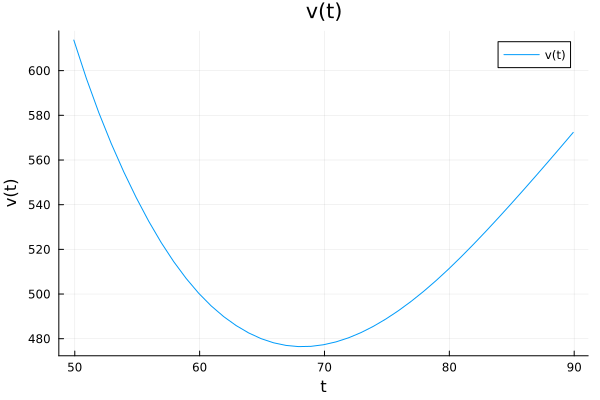

In [14]:
plot(ts, vts, label="v(t)", xlabel="t", ylabel="v(t)", title="v(t)")

KL regularized least-squares
   m =        500  bNrm = 2.2e+01
   n =       1000  λ    = 1.0e-02
                   τ    = 1.0e+00


In [168]:
kl = KLLSModel(kl.A, kl.b, λ=kl.λ)
# Reset counters
reset!(kl)

α=1.5
t=51.0

scale!(kl, t)

# Initial objective guess
σ = 0.0

it = 0
logging = 1
max_time = 30.0
tracer = DataFrame(iter=Int[], l=Float64[], u=Float64[], u_over_l=Float64[], s=Float64[])
solver = TrunkSolver(kl)
atol = 1e-3
rtol = 1e-3
subsolver_logging = Int(max(0, logging-1))
point_x = []
point_y = []

start_time = time()

# Set bounds and slope
l, u, s = 0.0, 0.0, 0.0
l, u, s, y = KLLS.oracle!(kl, α, σ, solver, tracer, logging=subsolver_logging, max_time=max_time)
tₐ, sₐ, lₐ = t, s, l

(51.0, -17.076173837626982, 595.2828283997931)

overshot the optimal t, increasing guess to σ=470.84575694362525


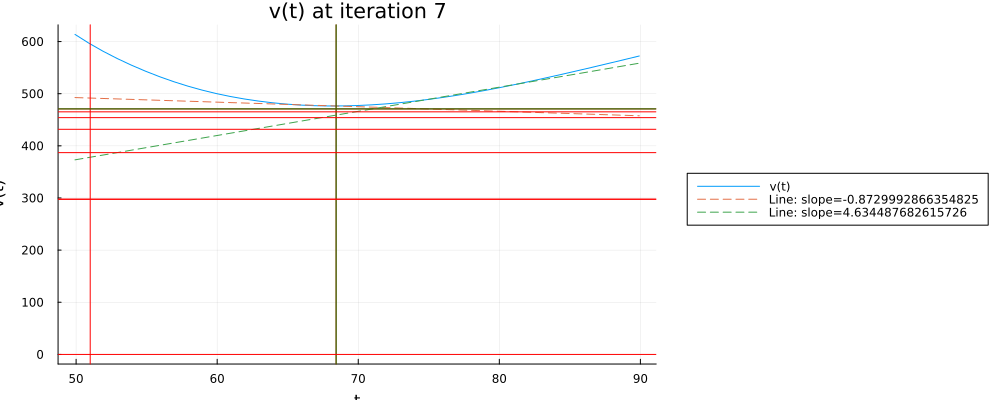

In [177]:
p = plot(ts, vts, label="v(t)", xlabel="t", ylabel="v(t)", title="v(t) at iteration $it", legend=:outerright, size=(1000,400))
for i in 1:1:1
    it += 1
    l, u, s, y = KLLS.oracle!(kl, α, σ, solver, tracer, logging=subsolver_logging, max_time=max_time)

    # Check if we overshot, adjust guess if we did
    if s > 0.0
        # Line with slope s
        line_y = [sₐ * (t - tₐ) + lₐ + σ for t in ts]
        plot!(ts, line_y, label="Line: slope=$sₐ", linestyle=:dash)
        line_y_2 = [s * (t - kl.scale) + l + σ for t in ts]
        plot!(ts, line_y_2, label="Line: slope=$s", linestyle=:dash)
        σ_new = σ + lₐ / 2      # Set the new guess to avg between lower bound and old guess
        push!(point_y, σ_new)
        vline!([point_x[1:end]], label="", color=:red, linestyle=:solid)
        vline!([point_x[end]], label="", color=:green, linestyle=:solid)
        hline!([point_y[1:end]], label="", color=:red, linestyle=:solid)
        hline!([point_y[end]], label="", color=:green, linestyle=:solid)
        lₐ = lₐ - σ_new + σ     # Since l is relative, fix it
        t = tₐ - lₐ / sₐ        # Set new t to the new intersect
        scale!(kl, t)

        if logging > 0
            println("overshot the optimal t, increasing guess to σ=$σ_new")
        end
        σ = σ_new
        display(p)
        continue
    end
    # Line with slope s
    line_y = [s * (t - kl.scale) + l + σ for t in ts]
    plot!(ts, line_y, label="Line: slope=$s", linestyle=:dash)

    t_proposed = t - l / s

    tₐ, sₐ, lₐ = t, s, l
    update_y0!(kl, y)
    # Add scatter points
    push!(point_x, t)
    push!(point_y, σ)
    vline!([point_x[1:end]], label="", color=:red, linestyle=:solid)
    vline!([point_x[end]], label="", color=:green, linestyle=:solid)
    hline!([point_y[1:end]], label="", color=:red, linestyle=:solid)
    hline!([point_y[end]], label="", color=:green, linestyle=:solid)
    display(p)


    small_step = abs(t_proposed - t) ≤ atol + t*rtol
    min_value = u ≤ atol + σ*rtol
    done = small_step || min_value

    if logging > 0
        @printf("lvl itn: %7d ℓ: %9.2e u: %9.2e s: %9.2e tₖ: %9.2e  Δₜ: %9.2e\n", it, l, u, s, t_proposed, abs(t_proposed - t))
        if done && small_step
            println("Stopping due to small step in t")
        elseif done
            println("Stopping due to small upper bound")
        end
    end

    if done
        # if the gradient is small, guess is good, break
        if s > -1
            return
        end

        # if the gradient is large, the guess is too high, lower it
        σ_new = σ + s * 1e-2
        push!(point_y, σ_new)
        lₐ = lₐ - σ_new + σ
        l = l - σ_new + σ
        t = t + (σ_new - σ - l) / s
        scale!(kl, t)
        if logging > 0
            println("converged at a high objective with slope $s, decreasing guess from $σ to $σ_new")
        end
        σ=σ_new
    end
    t = t_proposed
    scale!(kl, t);
end


In [170]:
l

595.2828283997931

In [74]:
σ

297.64141419989653